In [1]:
from TE_ROGERS.prepareTE_Reference import TE_ReferenceCreator
from TE_ROGERS.TE_UTR_Finder import UTR_Finder
from TE_ROGERS.createNeighborhood import NeighborhoodCreator
from TE_ROGERS.processDiffData import TEGeneProcessor
from TE_ROGERS.generateTestData import TestDataGenerator
from TE_ROGERS.TE_UTR_Gene_visualization import TE_Gene_ResultVisualizer

import os
import pandas as pd

In [2]:
# TE-ROGERS: Transposable Element - Regulatory Overview and Gene Environment Relationship Surveyor

In [3]:
#Neccessary Base Files
pathToTEBEDFile = "supplementalMATESTransfer/updatedTE_frame.bed"

pathToFirstProteinSequence = "ORF1.fasta"

pathToGTPFile = "gencode.vM10.annotation.gtf"
pathToRefGenome = "GRCm38.primary_assembly.genome.fa"
######


In [4]:
#quickAnalysisToGetSamplesCorrect
pathToOutput = "scRNA_cleanedDiffData"
pathToscRNATEDir = "differentialChanges_scRNA_Normal"
sampleComps = ["T2KO-Old_vs_T2KO-Young.csv", "T2KO-Old_vs_WT-Old.csv", "T2KO-Young_vs_WT-Young.csv", "WT-Old_vs_WT-Young.csv"]
correctSampleNames = ["TKO_Old_vs_TKO_Young", "TKO_Old_vs_WT_Old", "TKO_Young_vs_WT_Young", "WT_Old_vs_WT_Young"]

proba_not_de_df = pd.DataFrame()
lfc_mean_df = pd.DataFrame()

for sampleCompOne, sampleName in zip(sampleComps, correctSampleNames):
    pathToDiffFile = os.path.join(pathToscRNATEDir, sampleCompOne)
    diffFile = pd.read_csv(pathToDiffFile, index_col=0)
    
    # Extract columns and assign to new DataFrames
    proba_not_de_df[sampleName] = diffFile["proba_not_de"]
    lfc_mean_df[sampleName] = diffFile["lfc_mean"]

proba_not_de_df.index.name = None
lfc_mean_df.index.name = None

proba_not_de_df.to_csv(os.path.join(pathToOutput, "RNA_pval.csv"), sep="\t")
lfc_mean_df.to_csv(os.path.join(pathToOutput, "RNA_LFC.csv"), sep="\t")

In [5]:
pathToOutput = "scRNA_cleanedDiffData"
pathToscRNADataDir =  "differentialChanges_top20000"
sampleComps = ["TKO_Old_vs_TKO_Young.csv", "TKO_Old_vs_WT_Old.csv", "TKO_Young_vs_WT_Young.csv", "WT_Old_vs_WT_Young.csv"]
correctSampleNames = ["TKO_Old_vs_TKO_Young", "TKO_Old_vs_WT_Old", "TKO_Young_vs_WT_Young", "WT_Old_vs_WT_Young"]

proba_not_de_df = pd.DataFrame()
lfc_mean_df = pd.DataFrame()

for sampleCompOne, sampleName in zip(sampleComps, correctSampleNames):
    pathToDiffFile = os.path.join(pathToscRNADataDir, sampleCompOne)
    print(pathToDiffFile)
    diffFile = pd.read_csv(pathToDiffFile, index_col=0)
    
    # Extract columns and assign to new DataFrames
    proba_not_de_df[sampleName] = diffFile["proba_not_de"]
    lfc_mean_df[sampleName] = diffFile["lfc_mean"]

proba_not_de_df.index.name = None
lfc_mean_df.index.name = None

proba_not_de_df.to_csv(os.path.join(pathToOutput, "TE_pval.csv"), sep="\t")
lfc_mean_df.to_csv(os.path.join(pathToOutput, "TE_LFC.csv"), sep="\t")

differentialChanges_top20000/TKO_Old_vs_TKO_Young.csv
differentialChanges_top20000/TKO_Old_vs_WT_Old.csv
differentialChanges_top20000/TKO_Young_vs_WT_Young.csv
differentialChanges_top20000/WT_Old_vs_WT_Young.csv


In [6]:
TEFoldPath = os.path.join(pathToOutput, "TE_LFC.csv")
TEPvalPath = os.path.join(pathToOutput, "TE_pval.csv")
GeneFoldPath = os.path.join(pathToOutput, "RNA_LFC.csv")
GenePvalPath = os.path.join(pathToOutput, "RNA_pval.csv")

In [7]:
print(TEFoldPath)
print(TEPvalPath)
print(GeneFoldPath)
print(GenePvalPath)

scRNA_cleanedDiffData/TE_LFC.csv
scRNA_cleanedDiffData/TE_pval.csv
scRNA_cleanedDiffData/RNA_LFC.csv
scRNA_cleanedDiffData/RNA_pval.csv


In [8]:
#STEP 1 - Create Extract TE Reference Data

In [9]:
# referenceCreator = TE_ReferenceCreator()
pathToTERef = "TE_Sequence_Reference.fasta"
# te_reference = referenceCreator.convertBEDToFasta(bed_path=pathToTEBEDFile,
#                                                  genomeRefPath=pathToRefGenome,
#                                                  outputName=pathToTERef)

In [10]:
#STEP 2 - Find UTR Regions

In [11]:
TE_Family = "LINE/L1"
outputUTRFile = f"LINE_L1_5PrimeUTRs.fa"


# UTRFinder = UTR_Finder(TE_Family=TE_Family,
#                        pathToFirstProteinSequence=pathToFirstProteinSequence,
#                        pathToTERef=pathToTERef)

# #Create BLAST data base that will be used to search against first protein in reading frame
# UTRFinder.createBLASTDB()

In [12]:
# Perform the BLAST search with first protein in reading frame against TE database
#UTRFinder.performBLASTSearch(pval="1e-7")

In [13]:
#Get 5' UTR Regions (able to require start codon within certain distance, and select start codons)
# UTRFinder.findUTR_TEs(utrLengthThreshold=500, startCodonDistance=None,
#                        outputFasta=outputUTRFile, startCodons=[])

In [14]:
#STEP 3 - Create Neighborhood file and find genes in neighborhood

In [15]:
#Create Neighborhood
finalGeneNeighborhoodName = "Line_1_analysis_gene_neighborhood.tsv"


neighborHoodCreator = NeighborhoodCreator(outputUTRFile, pathToGTPFile, baseName="Line_1_analysis")

In [16]:
#Create the reference BED file based on a given GTF annotation

#neighborHoodCreator.createGeneRefBED()

In [17]:
#Create neighborhood bed file based on TE fasta file
#neighborHoodCreator.createNeighborhoodBED(neighborhoodSize=5000000)

In [18]:
#Determine which genes are in which neighborhood
#neighborHoodCreator.determineOverlappingFeatures()

In [19]:
#Calaulcte distance from each gene in neighborhood to each TE
#neighborHoodCreator.createFinalDistanceFile(finalGeneNeighborhoodName)

In [20]:
#STEP X Generate Test Data for fold change and p-val
# testDataGenerator = TestDataGenerator(numGeneIDs=3000, numTEIDs=2000, pathToTEneighborhoodFile=finalGeneNeighborhoodName)
#
# testDataGenerator.generateAllTestData(barcodeLength=16, numBarcodes=3000, outputDir='testData42Dir')



In [22]:
#STEP 4 - Incorporate Pval and fold change data into final results file for further analysis and visualization

In [23]:
summaryFileName = "TE_Line_neighborhoodSummaryFile.tsv"
outFileNameDistanceFile = "closestDistance_neighborhoodSummaryFile.tsv"

teGeneProcessor = TEGeneProcessor(TEFoldPath=TEFoldPath,
                                  TEPvalPath=TEPvalPath,
                                  GeneFoldPath=GeneFoldPath,
                                  GenePvalPath=GenePvalPath,
                                  TE_gene_neighborhoodPath=finalGeneNeighborhoodName)

#teGeneProcessor.filterTEsAndGenes(TEFoldCutoff=0, TEPvalCutoff=0.1, GeneFoldCutoff=0, GenePvalCutoff=0.1)




In [24]:
teGeneProcessor.createSummaryFile(summaryFileName)

Beginning to create summary file!
                        591475    3130725    2593706   1932377    1932388  \
TKO_Old_vs_TKO_Young  -9.796456 -9.823634 -10.309040 -9.640309 -10.488854   
TKO_Old_vs_WT_Old     -3.289648 -2.066389   0.032271 -1.302153  -0.255453   
TKO_Young_vs_WT_Young  5.596832  8.136406  10.452034  8.374566   7.487798   
WT_Old_vs_WT_Young    -1.002467  0.172140  -0.093287 -0.241525  -3.019146   

                        4054796   3340865   1932390   1932389   2162202  \
TKO_Old_vs_TKO_Young  -9.915858 -7.688610 -9.485054 -8.765171 -9.021322   
TKO_Old_vs_WT_Old      0.143244 -3.781764 -3.677105  0.989325 -3.004981   
TKO_Young_vs_WT_Young  6.936985  3.155545  9.409355  5.231445  8.572144   
WT_Old_vs_WT_Young    -3.056621 -0.907876  3.432288 -4.541781  2.397589   

                        455434    3469969   2283009   476886    306304   \
TKO_Old_vs_TKO_Young  -8.164936 -9.686789 -8.512476 -8.172540 -8.712855   
TKO_Old_vs_WT_Old     -7.888517 -5.138630 -1.475123 -2

In [26]:
teGeneProcessor.getClosestTEDistanceToGene(summaryFileName, outFileNameDistanceFile)

Began Looking for TEs closest to each gene
Found TEs closest to each gene


In [ ]:
#STEP 5 Results Visualization

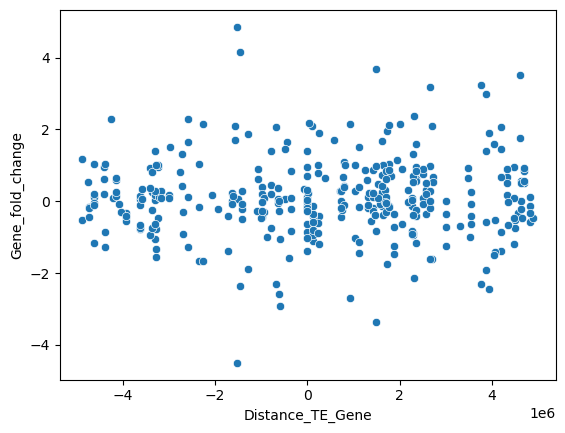

In [24]:
visualizer = TE_Gene_ResultVisualizer(pathToFinalSummaryFile=summaryFileName,
                                          pathToClosestDistanceFile=outFileNameDistanceFile)

visualizer.createClosestDistancePlot(pvalFilter=0.06)


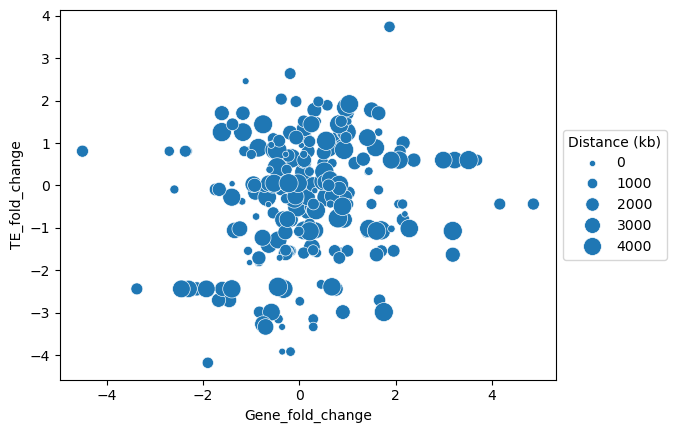

In [26]:
visualizer.createFoldCorrelationPlot(genePValFilter=0.06, TEPValFilter=0.05)